In [4]:
%%html
<script src="js/showNotes.js"></script>

<p style="font-size:9px;">Version: Discussion version 1, 
    July 18, 2023 | <b>updated Nov 11, 2023</b> [&copy; 2023 gb]</p>
<img src="images/ischool-banner.png" />
<p>&nbsp;</p>
<div style="height: 80px;color:#3B7EA1; font-size:24px; vertical-align:top; text-align:left;">
    Computing for Data Science
    <img style="width:20%; vertical-align:top; float: left; padding-right: 20px; display: block; margin-left: 0; margin-right: auto;" 
         src="images/ucb_logo.png"/>
</div>

<hr />
<h1 style="font-size:36; color: #003262;">Week 11: Optional Examples</h1>
    <li><a href="w11.ipynb" target="new">
            Main Week 11 Page</a>
    </li>
    <li><a href="w11_encoding.ipynb" target="new">
        Encoding, SQL</a></li>
    </ol>

<hr />
<h2 style="border-radius:3px;background-color:steelblue;padding:5px;color:white;"> 
Real-World Examples: Vector Models + Plots, NLTK, Bit Signatures
</h2>

<hr />
<h3>Advanced Demo Extras: Using python for fun in Information Retrieval. Examples of applying our work in real practice.</h3>
<p>These large corpora of term distributions are the basis of retrieval engine design as well as the basis for large language models and machine-learning.</p>
<ol>
<li>Vector Space (see Baeza-Yaets &amp; Roberto-Nieto, <i>Modern information retrieval</i> NY: ACM Press.)</li>
<li>Training an automatic document classification scheme, the NLTK and corpora - natural language toolkit – please check out <a href="https://www.nltk.org/data.html" target="new">the documentation</a> 'cause it's changing.  The usual Reuters library is gone - but check out the Warwick, Brown or other corpora.</li>
<li>Bit-Signature - a compression approach used in many fields and in network communication</li>
</ol>
<hr />

<p style="border-radius:3px; background-color:steelblue;padding:5px;color:white;font-size:20px;">Fun with vectors.</p>
<p>In full-text retrieval the usual model is <i>Q<sub>i</sub></i>, <i>D<sub>j</sub></i>, <i>F(q<sub>i</sub>,doc<sub>j</sub>)</i>, and <i>R</i>. <br />
    A <b>Q</b>uery representation, <b>D</b>ocument Collection representation, a matching <b>F</b>unction, and a <b>R</b>elevancy ranking function.  The issue is matching a human's expression of "need" using semantic terms to a collection of (usually) decontextualized terms.  We need some measure of association been the query expression (I want "fish") and the collections meaning of "fish."</p>
    
<p>The result of matching is affected by <u>term weighting</u> to try to emulate how people actually use language and then how to rank the resulting set in descending order of <u>relevancy</u>.</p>

<p>There are <i>many</i> ways to try to succeed at this.  Here are two popular ones: the geneval <b>vector space model</b> (GVM) and a <b>bit-signature</b>.</p>

<p>NOTE: The GVM demo'd below is different from the original versions or as applied in full-text retireval but still applies to this field. Here's we're using a 3d display of 3 items, not the usual zillions of vectors and the cosign value &theta; for similarity.
There's a lot of projects out there to help, such as word2vec (https://www.analyticsvidhya.com/blog/2020/08/information-retrieval-using-word2vec-based-vector-space-model/), Gensim and tools for corpus analysis. Otherwise you could shift to scikit-learn and the natural language toolkit (nltk).</p>

<p style="border-radius:3px; background-color:steelblue;padding:5px;color:white;font-size:20px;">Example 1</p><p>The vector space model is one of the earliest semantic-oriented retireval model.
d<sub>j</sub> = (w<sub>1,j</sub>, w<sub>2,j</sub>, ... w<sub>t,j</sub>).  The "weighting" part could be the various dimensions of some objects.</p><p>
    We can use words extracted from a bunch of digital documents or other things that interest us, say dating services, or trips, or cars.    For example Cars have dimensions of max speed, cost, acceleration time.  So say we have 3 cars:  BMW, Porsche, and Tesla.  </p>
<table width="50%">
    <tr><td>car</td><td>speed kpm</td><td>acceleration seconds</td><td>price in USD </td></tr>
    <tr><td>Porsche</td><td>304</td><td>4.4</td><td>99,200</td></tr>
    <tr><td>Tesla</td><td>250</td><td>3.8</td><td>79,990</td></tr>
    <tr><td>BMW</td><td>160</td><td>7</td><td>60,000</td></tr>
    </table>
<p>Using these vectors (porsche = (304, 4.4, 99200); tesla = (250,3.8,79990); bmw = (160,7,60000)), we want to know which car to buy based on these dimensions that interest us.  Here we have only 3 items with a few features; imagine a much bigger model!  So let's use something from python designed for this - numpy.</p>

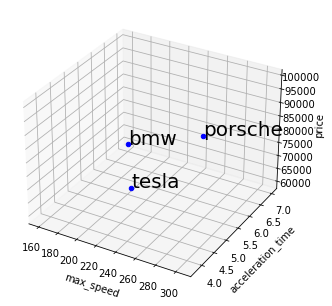

In [81]:
import numpy as np
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure
# features
X = np.array([
    [304, 4.4, 99200],
    [250, 3.8, 79990],
    [160, 7, 60000]
])
# labels
y = ['porsche', 'tesla', 'bmw']
# setup our chart
fig = figure()
ax = Axes3D(fig)
# iterate on the examples and plot them
for i in range(len(X)): 
    ax.scatter(
        X[i,0],
        X[i,1],
        X[i,2],
        color='b') 
        
    ax.text(
        X[i,0],
        X[i,1],
        X[i,2],
        '%s' % (str(y[i])), 
        size=20, 
        zorder=1,
        color='k')
# label our chart
ax.set_xlabel('max_speed')
ax.set_ylabel('acceleration_time')
ax.set_zlabel('price')
pyplot.show()

<hr />
<p style="border-radius:3px; background-color:steelblue;padding:5px;color:white;font-size:20px;">Example 2: Vector Space and the NLTK</p>
<p> we can try using nltk and grab prepared corpora of words.  Among the most famous are the Brown Corpora, Warwick, and Reuters.</p>
<p>Remember the idea of <i>similarity</i> between collection and query.  The most common technique is <b>term frequency-inverse document frequency</b> or TF-IDF (which is also built-into MySQL!).</p>
<p>There is <u>way more</u> to this than this tiny glance.</p>

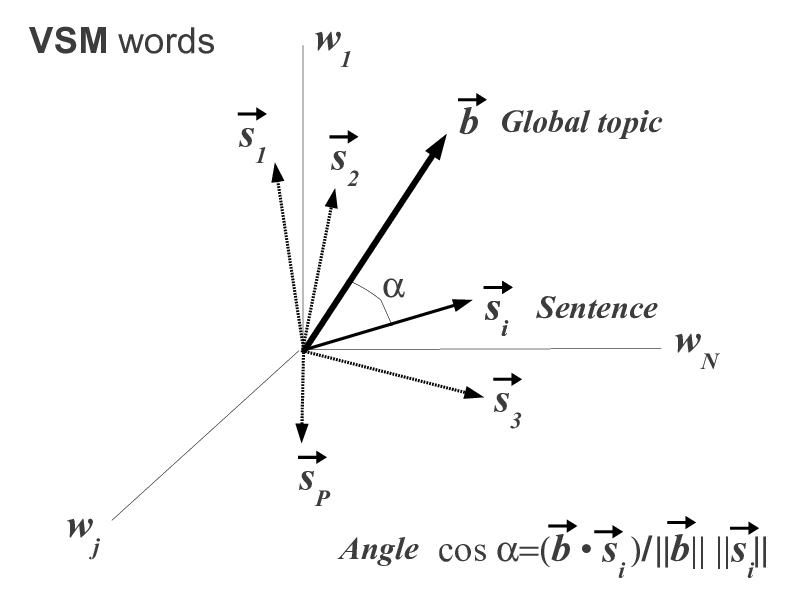

In [94]:
display.Image("images/vectorspace-0.png", width="600")

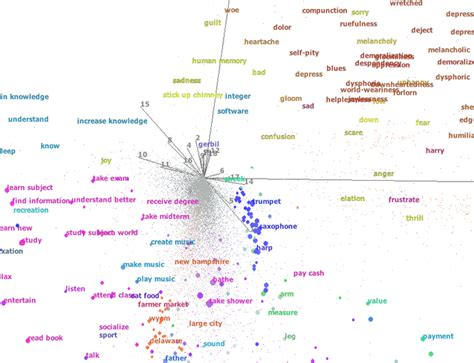

In [96]:
display.Image("images/vectorspace-1.jpg", width="600")

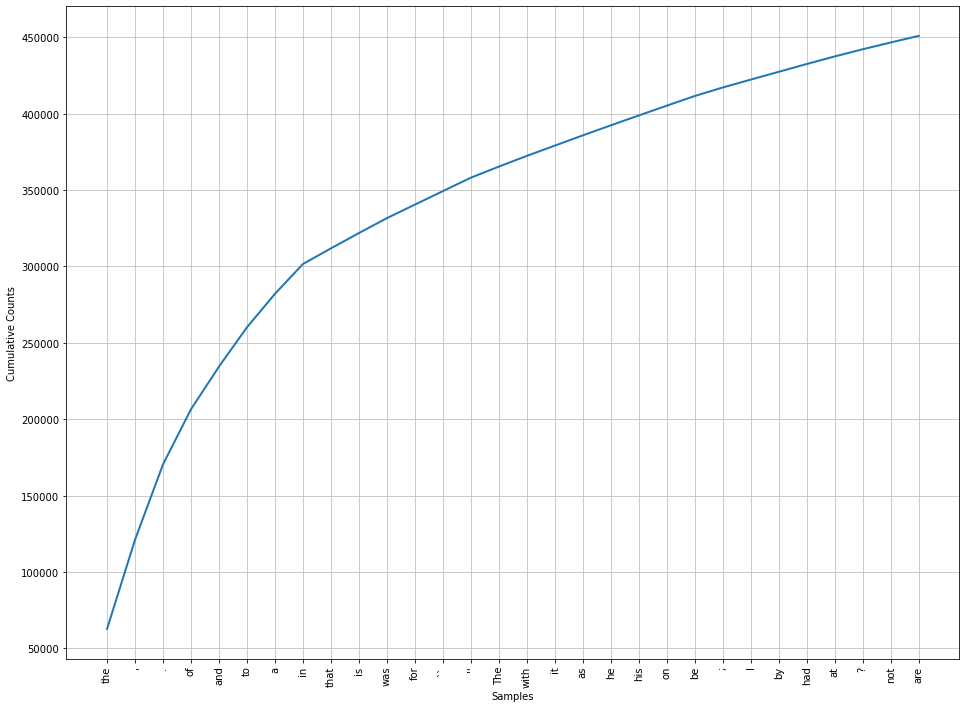

In [82]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import nltk
# should already be loaded on my machine; else add nltk.download()
# nltk.download('reuters')
from nltk.corpus import brown


# how many terms?
#len(reuters.words())
len(brown.words())

vocab = set(brown.words())
len(vocab) # to see # of unique tokens.

# get their distribution
fdist = nltk.FreqDist(brown.words())
fdist.most_common(15)

# display their frequency
fig, ax = plt.subplots(figsize=(16,12))  
ax = fdist.plot(30, cumulative=True)

<hr />
<p style="border-radius:3px; background-color:steelblue;padding:5px;color:white;font-size:20px;">Example 3: Bit Signatures</p>
<p>
Given a set of <i>n</i> properties of a document, for example, a list of subjects contained in an entire document collection, and a number of documents, create an <i>n x m</i> matrix.  </p>
<p>Imagine you have a list of all the topics in some collection - from abacus to zebra.  These we'll call <u>vectors</u>.  Each vector represents some subject or facet of interest - it can be anything. For instance, [cats, dogs, birds, red_things, and so on] and each of these terms have their own matrix (cat is in 0, dogs in 1) and so on.</p>
<p> An algorithm or human judge reads the &ldquo;document.&rdquo; A "document" is any digital file - it&rsquo;s a representation of some content.  It could be some part, such as an abstract, title, individual paragraphs, entire sections, entire document (or the equivalent depending on the medium)] and a binary value (0 = this facet is not in this unit; 1 = this facet is in this unit).  The result looks something like:
    <code>0, 1, 0, 0, 0, 0, 1, 1, 1, 0, .... </code>.  Ultimately we could create a <u>term frequency/document matrix</u> or identify the main topic of each paragraph and collectively create a document signature representing all the concepts and then search to find what we need.
</p>
Once the matrix is created ... use it to find intersections between our &ldquo;query representation&rdquo; and the above &ldquo;document representation.&rsquo;  A match can be binary (it&rsquo;s there or not) or we can extract subsets of related terms (&ldquo;all terms suggesting dogs&rdquo;) and then use the resulting value for <u>relevancy ranking</u>. </p>
<p>Also let&rsquo;s use such a matrix to winnow (reduce the space of data) to be inspected to be included.  Pretend we have millions of records coming in rapidly to be processed.  We need some technique to pre-process the data as fast as we can to reduce the set that is actually used for other analysis.  
    </p><p>What&rsquo;s more, the ever-streaming data set must be available simultaneously for other reductions and analysis.
<br />
Write a script and time several runs.</p>

In [83]:
def bin_add(*args): return bin(sum(int(x, 2) for x in args))[2:]

In [84]:
""" here, say the 0th binary value means 'cats'; 
the 1st means 'dogs', and so on... """
doc1 = '010010101101010100110101010101010100111111111'
doc2 = '000000000000000000001000000000000000000010001'
doc3 = '110101010101111111000000000000000000000000000'

print(bin_add(doc1))

10010101101010100110101010101010100111111111


In [85]:
print(int('010010101101010100110101010101010100111111111',2))
print(int('100000000000000000001000000000000000000010001',2))
print(int('110101010101111111000000000000000000000000000',2))
print(int('010101010101111111000000000000000000000000000',2))
print(int('00000000',2))
print(int('00000001',2))
print(int('00000010',2))
print(int('00000011',2))
print(int('00000100',2))
print(int('00000101',2))

10284947909119
17592202821649
29325902479360
11733716434944
0
1
2
3
4
5


" for each of the above statements we can identify rapidy the \nthemes in the 'document' it represents.  Topically similar \ndocuments have values in a certain range.  Determining the \ncutoff points between these ranges is fuzzy."

<p> ... 
for each of the above statements we can identify rapidy the 
themes in the 'document' it represents.  Topically similar 
documents have values in a certain range.  Determining the 
cutoff points between these ranges is fuzzy.</p>

In [86]:
# Do the same as a pandas dataframe
# for varieties of approaches see http://pbpython.com/pandas-list-dict.html
import pandas as pd

#
items = [('title',['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']),
         ('t1',[0,1,0,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,1,1,1,1,1,1,1]),
         ('t2',[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1]),
         ('t3',[1,1,0,1,0,1,0,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]),
        ]
df = pd.DataFrame.from_dict(items)
print(df)

       0                                                  1
0  title  [A, B, C, D, E, F, G, H, I, J, K, L, M, N, O, ...
1     t1  [0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, ...
2     t2  [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3     t3  [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, ...


<hr />We can import using lists and dictionaries ... but also other technqiues, to be sure.  from_items is probably more common.  Now the challenge is to extract a subset of data that conform to our needs.  For instance, say columns A and G are conceptually related for this project and we want to extract them.  

<h2>A challenge ... </h2>
<p>Imagine we have x number of titles (or documents, represented above by t<i>n</i>) and a series of facets (or subjects or whatever interests your group has; A - ...).  
Now, say you need to extract all the matrices in A and G (because you have back-end data that says A and G are related to some need).  Once you've extracted A and G, can you determine which of the 2 has a total higher value?  [That means we start of binarily ... 1/0 if the topic A or G are there ...] and then we have to find facets that are conceptually close to A|G (here you can make up values, such as B and Q).  Then bit-wise sum of the original A|G and subsets and then "rank by relevancy."  
<br />
The concept of "relevancy" is the very heart of search engine differences. In addition, there is also a "weight scheme" that's included.  For instance, if A is conceptually related to B, C, F, Q, and X then how do we integrate them all and then normalize 'em...  and given the variance in these data, what kinds of weight schemes would we want to add (that is, are there metadata or other inputs to include?  [E.g., PageRank's weighting scheme]).  </p>
<p>Now, instead of an evidence-based weight scheme, try using statistical inference from another set of documents ... to get the expected distribution given a context ... and see if you can create your own large language model bot!</p>

<h4>How fast and how else?</h4>
Here are 2 other challenges:  (a) can you create a group of data, import them as a list and 
    as a dictionary, and then time the differences in retrieval speed?
    Another real world question is how to reduce the volume of data before processing?  For instance, what's the probability of a set of n facets being sufficiently close to include in further processing?  [This is a real world question posed to me yesterday by a Boston company.]
This is <i>entirely</i> optional - a fun thing to play with ... cheers!

<p>As of Mar 13, 2022 - GB; Updated Nov 11, 2023 GB</p>